In [1]:
from newick import loads
import newick
from DNASkittleUtils.DDVUtils import pp

# Cafe

Families for study were determined in "FunctionsForFamilies.ipynb" under the name `wgd_study_ints` based on the following criteria:
#### Select families for study in Repeated Loss Tree mode
* Must be in every Oleaceae species
* Must be in > 1 copy in >25% of the species
* Not present in more than two copies in any species
* Must have a std dev > 0, meaning variation is present
* Ks indicates copies were made in the most recent WGD

In [2]:
wgd_study_jsg = [5044,288,17929,16962,2710,18624,6147,5697,19719,25035,43120,41330,14462,28309,39732,9986,26592,1537,1311,7476,11563,5726,41794,6085,24971,35926,29690,39321,6972,32496,30203,30159,28991,22555,16237,16404,34358,33716,43166,14438,28348,26107,21595,25941,34506,14181,23747,40629,9755,28752,1255,18066,30384,26355,40276,12671,8506,11345,14166,15456,2379,22925,22607,36681,4993,5870,17690,13092,34155,33296,36574,7356,31287,27618,15861,36016,36181,32564,39607,8110,24662,29830,31557,43819,503,30301,35403,40570,19721,11593,3216,17120,6617,1249,15684,2426,21187,29315,14273,32131,13591,26526,13395,31503,38174,27798,8889,20584,14586,24680,547,42306,4807,2153,25158,35269,19508,40947,7031,4062,36495,16710,28258,32796,37921,20670,36882,42773,25894,14524,26825,30574,29279,32472,16966,27698,43477,40072,32962,19909,34644,21394,3177,27391,42187,24129,27794,22249,43898,25282,14070,22036,273,15614,30537,27674,9626,29530,26984,29102,10955,36425,4832,28483,28896,39471,36197,23609,30806,11517,27812,6117,15569,13382,336,28925,8080,20707,29177,36413,30256,35374,24779,30935,17820,40734,13985,7038,39726,20836,22086,13128,30238,9146,23712,25011,5523,5010,22194,19296,12295,9969,25987,6503,8702,26011,28871,12000,4413,22870,37889,12783,8663,35378,11521,30086,42747,22476,24633,32359,36824,31310,29467,10804,36367,31123,32405,34467,39357,43768,31011,36677,8060,27018,22453,8467,8378,20578,1507,24233,40940,17363,17396,35653,19029,4997,14204,22726,6279,31674,32173,5250,34675,22490,7362,17947,7480,4614,18925,41239,25749,10465,21731,15846,30610,30732,8406,26546,33441,13095,33697,13952,11236,35459,14831,228,36255,30339,19101,11881,19552,6324,35260,26733,21777,32851,22008,27372,14834,43460,30680,27942,30223,5463,28832,42411,34334,17101,13167,37102,14439,18762,9647,37192,32527,7069,7659,869,24903,39747,33652,33079,13240,43136,30562,35087,4447,2302,1828,19469,4327,16302,18037,11753,18393,36974,37472,41904,31466,40049,28638,14727,15138,35076,33854,8781,3197,29607,9637,24632,31337,18015,42966,8946,21969,2256,10007,22111,3199,31080,30974,7654,31714,38182,30029,38964,35248,20028,7358,43867,26433,43299,38652,15291,36934,38477,36300,19950,16699,41433,22684,5949,10475,27440,3354,38246,21460,34402,26759,10737,40057,30279,15417,24573,19913,659,21972,40428,24238,34314,16011,27410,8933,3591,31408,29513,1695,4737,13206,18970,35059,6705,34558,42621,2559,17612,1722,6065,37216,38511,43905,29551,28893,9845,24058,2725,812,39598,5082,6245,18204,27006,11551,43736,29210,689,6956,13512,11125,18508,20752,16536,22665,32683,42265,18998,26219,34237,25274,9501,39140,22740,12157,34746,24924,23258,26595,35078,5340,24067,25441,37717,34693,133,10522,21227,11685,1585,43738,37071,22525,32103,23741,23622,9150,11062,21357,39451,20014,31374,33258,20091,34922,6353,42737,33643,11482,21919,31128,30725,12016,34972,3377,27290,31377,25711,34835,43620,30776,29431,11690,8065,41844,10482,29942,5636,222,9453,4202,33748,20466,18002,9702,6445,25639,42556,6309,26791,841,8853,31107,28333,2475,28873,26729,13024,2518,33461,5130,21302,21483,14489,30678,16344,6303,26648,13815,27890,27555,38587,17813,26588,522,39110,20879,8973,531,26540,21580,7490,13099,1458,20283,36453,2033,23610,22777,31712,28912,9486,34735,26380,34337,10154,35578,22042,20219,25003,32307,13028,34250,7815,12623,2806,25245,16823,24246,42150,24801,20362,43301,14984,43335,4638,5331,3714,14829,19965,30057,2114,39718,22250,12169,19325,35982,10502,33690,19406,16222,1822,5794,42758,36179,25965,23404,42798,25721,2658,36938,14254,13262,24165,42595,8736,9569,31000,36790,20037,32706,32910,32108,21592,13155,24161,37250,5933,41832,941,43929,6248,31183,32383,3095,3322,9977,41876,42042,40135,16705,940,29960,2180,7775,38369,41697,156,1304,27039,41930,30514,19593,33824,19637,11620,380,32497,11529,5698,39611,42407,42999,36736,28116,31006,14183,25870,18239,30239,11504,15944,29892,32363,27629,38727,36521,7795,11606,17134,1534,3135,15344,9029,15782,2437,17738,43680,4900,33623,13144,35427,3474,7623,28103,4273,36605,24079,1848,37122,6827,12078,6871,11040,1789,5961,17777,8418,37310,17923,16666,29890,28553,14099,18064,43807,28395,25311,18119,35612,1277,12751,33607,39594,32773,6672,28329,19942,11376,1717,6070,28663,17167,40588,7338,34859,41389,15774,5893,25497,28576,6506,14573,4989,9342,33102,41527,42912,27790,40927,9892,34987,42766,22987,28608,9132,42574,25820,31144,217,23387,24045,1602,10950,37854,662,10831,10971,9945,35903,35415,5778,41232,3375,42845,22114,473,36411,4754,26061,13408,25117,37535,6214,4743,39012,38810,10150,17997,36079,18297,20223,17688,7180,8461,35544,34236,19442,15330,38143,41129,37933,18763,26834,3985,30962,5253,29217,36740,14682,23029,32866,4146,37703,39897,36139,42228,16761,19581,28256,28885,6903,12290,4365,31927,10561,39687,18093,35835,21903,31067,35785,2593,34832,29633,15987,31580,29770,4740,20906,23192,20629,43772,22158,102,6239,42241,24812,20313,41151,11556,15883,7120,10981,19327,8069,10943,32547,23820,42338,43871,40963,19930,43660,14778,37480,16778,5983,9589,15994,446,39109,25371,42484,16696,16341,5867,27108,29590,24082,35601,1636,11849,11271,17567,12507,36170,306,38668,9471,18833,1377,39843,28253,36559,15302,30128,36647,13706,22911,24941,21076,28725,22831,43698,31661,36541,15735,32118,37972,14425,18384,35423,38859,469,42702,30516,16272,18425,14734,3795,23301,2565,23923,4930,1068,21600,12373,42309,1131,39764,19863,8713,13801,36443,32660,10758,7165,31608,17578,2419,24655,21041,3047,38515,29008,28128,23922,41963,11604,39582,40373,34636,10032,13352,17025,35083,6199,40548,27553,2228,6930,28796,40145,18953,8121,31783,6118,25978,18922,28741,23125,20387,4825,38680,35192,485,4576,7505,23289,16565,32980,43231,28620,9234,22634,40071,26668,37468,30068,13793,33470,23319,36587,16792,33354,344,43694,36308,43944,40215,38497,20209,6725,32687,13673,13994,27894,22853,3617,5238,24202,39193,1793,32448,22554,13601,38573,20240,34173,16283,26207,17458,17136,9436,31762,4558,7291,31744,17551,24485,11699,14687,8428,33492,41639,32663,30672,7586,43270,34578,19521,3629,10485,14459,35214,14416,11678,24488,24262,23190,20855,31235,5277,23588,26090,39924,12571,28596,40481,16416,11800,23072,28287,13516,19598,14242,40351,33161,3327,39247,41651,19506,38254,37428,16371,8908,10920,36240,38228,23882,16411,38904,27385,17466,7441,7516,1219,23344,42910,5272,40677,30973,1470,8280,1330,30118,8477,5974,12129,10854,23139,33909,41914,39995,23850,18262,18368,18409,18871,12572,3821,14240,8573,27725,14637,6156,1895,16463,39114,12601,38563,42465,34509,8022,20419,38968,43624,7410,11082,40017,24794,16444,16213,30581,1526,8283,22526,40178,19192,22428,37205,35219,22621,40686,21612,25512,18474,37936,35474,21378,11511,42459,8105,31256,32671,1824,25399,20032,30529,32231,17098,12280,4116,2013,11033,12032,9895,14161,27880,23081,37137,38789,43286,18410,28461,17187,29277,12580,27952,21520,30443,11879,33222,40043,38302,25650,638,39434,15877,190,20775,18550,38757,3232,33631,2259,39005,4226,30754,14787,20933,6943,24823,15955,6073,42612,21256,12806,16310,26288,16261,11948,6873,12885,29898,6322,5344,30647,8025,37737,25601,14853,35754,24349,35528,13440,35074,39345,23832,35719,34484,15609,27300,26524,41321,41434,38051,5625,43197,42671,42258,29539,23616,43091,7686,3173,43536,32419,39532,29816,37606,34790,42473,32751,23579,40506,31101,32021,30399,13569,5640,29583,17147,14750,34461,30834,35833,17980,27101,37512,27556,28486,5285,6539,33885,15588,35216,33406,4731,25605,22040,2719,14351,3399,32372,42190,34422,18670,6803,13533,24213,19829,18813,26926,40811,24466,43298,15765,26641,8878,1422,15915,3816,13017,25081,19033,40848,7708,6804,11942,10087,20278,33056,32248,36799,17353,34390,43693,10600,10636,42887,42186,43054,35636,19889,24994,18537,4091,23349,32718,18392,23946,3259,4531,33735,5393,32334,23496,6542,23654,41741,18312,706,38275,7652,36088,35585,39405,347,18636,7263,23875,35150,39185,4329,29370,30866,43495,40922,41991,4131,35316,18515,35560,4402,36753,2216,32109,19599,15123,34596,43164,9009,9729,17721,25252,37742,27776,2817,26670,36307,15269,37256,43145,17432,4599,20452,26528,19603,20019,28119,17838,24102,6295,5900,2,31387,41026,7449,12052,3994,1148,30576,37707,2382,25324,22863,2082,22332,41066,23807,32480,33964,2802,448,5763,10969,328,17590,14301,40149,36121,39941,3926,4250,37054,32792,34131,12401,23614,3087,12939,14497,10882,28755,8651,39920,13776,38852,39910,21694,40367,34172,26532,12176,40038,33563,3615,42436,33020,35355,36417,35233,39327,24849,12217,4500,7905,34605,31861,1343,23740,31367,8919,17891,38011,25246,14453,6277,43186,19436,26218,2740,38049,17896,39083,6069,35906,41150,29076,5758,23048,2070,41756,31682,19048,40607,25966,9823,3033,32267,27244,31965,2331,6720,10363,28565,34199,29083,21899,27115,31825,34095,38183,13568,43154,30133,7541,29387,29796,13053,23151,33659,36258,16595,32154,1807,2097,20090,29348,13118,16647,15577,16747,28424,31823,10263,36096,38847,25413,22153,43860,7832,20051,26177,12747,41896,15403,14514,8698,1370,43341,3282,32283,33851,5102,16551,15791,28738,38044,754,34680,30592,36239,34216,27852,1077,9792,40517,13166,15715,20810,14576,4357,6992,14185,3892,40490,20505,12533,39730,13965,19629,7280,857,32928,15743,43162,41439,37935,33167,39709,15716,31352,6950,23416,33857,13281,26658,617,43732,31201,20502,36077,14898,7726,32871,43943,28430,20318,1153,24100,4452,40975,11002,33431,19211,5571,7995,7145,26661,33642,32900,36405,37730,4472,4341,35992,3227,16811,3334,402,1608,4024,36644,608,22527,26660,12395,5823,7983,4619,26812,41464,15536,39922,33286,6473,9153,42867,8036,5110,3364,11139,8716,26266,31165,17595,10451,16199,2949,15606,42209,1995,32102,37051,38320,4241,8711,20852,14388,17084,41031,16128,1032,12439,38494,30307,19559,21980,8341,27989,15764,18043,36544,4330,11915,40252,41545,30719,15599,24405,22891,31885,19853,14331,27732,36237,23191,9976,31469,1522,24012,17026,38221,16081,27090,43023,810,43204,22220,21138,34056,36053,36979,9424,19717,28305,24959,3945,3298,37265,687,23889,7746,18821,33382,9571,17420,7824,26841,11505,23658,11631,162,1557,13502,23274,35665,41242,43273,14870,42334,25152,41666,17032,3634,17204,41072,31271,34650,32002,28130,8490,26629,5054,17344,24734,42314,43784,31,26603,21985,23406,39361,30844,16735,7719,23152,11700,26222,38832,4106,29377,18886,37282,5951,35675,39275,17041,29598,27263,43497,3425,29680,39523,3846,35507,34054,1238,13973,26691,4392,35684,21533,12743,19532,32067,16460,41513,38435,34361,34086,29786,22624,3812,37212,31323,24699,22142,39736,29608,42812,8255,26225,37473,6849,18942,29211,39735,12679,23524,43690,7926,5838,4460,6649,6018,43814,13564,3660,24810,31786,17729,1160,12254,14628,25621,18434,14267,15590,35691,17254,1435,477,23760,22392,14986,31961,42755,15692,7883,21129,148,19461,37038,21075,36206,24292,37115,35404,37448,36977,8513,26257,24265,9151,29108,30483,15818,1107,34085,9883,29518,34648,33578,26542,33965,24939,41395,14155,35336,15424,27423,9684,13966,15461,25156,10073,20473,19460,26654,28634,20562,43658,2800,17557,39371,34271,43532,35111,34543,10864,22835,29078,5582,23498,5165,21370,36839,21109,14532,6249,26215,15838,23590,33126,39568,31796,42521,12968,24147,21662,737,43370,11927,12320,23167,17110,34988,26793,28183,34594,37677,22849,40782,35139,40762,36699,16723,13468,17937,15434,24620,31321,15093,29384,6355,31947,25096,13211,40436,24304,38283,15057,37674,13254,19573,10507,16836,21581,17008,4337,29766,23,5248,33448,28614,1362,12761,24569,2855,7246,34076,31289,17255,25686,11516,6124,43763,15271,31787,3451,11577,33169,7053,43842,34186,1595,11419,4121,42486,34673,36592,19266,30018,39469,25384,14997,13737,27342,27687,22998,11843,4284,4476,42537,9920,26559,36382,25603,6433,23239,11129,500,36986,16763,15678,35776,3913,6011,9045,35071,19200,26350,392,3551,2571,18152,43110,4290,3965,24933,32818,31178,42636,18860,10705,28557,2288,37021,18174,2611,28433,37910,35706,26931,165,5738,37247,18649,2549,19541,10420,11755,17043,7694,7602,23911,32319,42803,32968,3887,24316,5295,14513,6931,40495,40890,20012,22336,22434,7028,26871,28826,32060,27936,28808,14653,583,18816,13672,883,32865,27988,15418,13103,32811,1267,32478,3423,18327,15843,18237,15016,41883,1755,12949,26,3026,5092,7454,26927,31139,17756,37490,17428,11144,8435,32782,11212,41208,37140,34909,317,36383,22713,25257,25779,14951,15281,32052,35844,31575,42440,41828,43153,25382,11026,23979,8313,9260,91,26248,40931,35718,34357,6075,6859,11185,3978,20807,31249,24059,39076,16612,5897,8455,27962,14338,3644,1761,9910,11553,37325,12348,10004,1327,42594,8,13063,34830,23972,19546,32710,35124,26422,18070,38448,29065,41127,37548,29944,35794,23028,33192,27467,35593,24741,22472,41161,20612,21183,27304,31382,28009,10358,1164,12782,23826,41478,10480,32183,746,7858,851,41689,2073,40047,21217,29880,19705,42987,30902,43890,32626,27401,9785,10734,42996,15109,28566,25643,27438,26259,36662,38420,21084,7551,22817,42789,17802,35301,42166,37884,1473,37980,14326,15805,36795,1929,38544,25417,18789,1960,139,32557,39158,35570,31742,3840,10893,25493,36431,20407,10424,43094,27441,23868,436,40535,19725,28049,194,915,36932,17137,32195,3909,13539,2583,40185,20957,7329,33609,39351,37822,15788,22950,38338,14020,31980,21870,14914,17478,25706,32875,40090,25398,2429,19383,18351,14661,3712,15642,8778,38654,20991,12825,3701,18248,41985,26935,28404,21640,12621,30662,24821,8412,32613,28680,1566,35127,42786,4733,26276,39138,4010,11807,1681,26063,9996,38367,11147,42211,4340,39152,38771,2163,31910,33196,33536,34733,8893,8170,27655,27469,32431,38055,17121,25327,34839,13628,10907,43450,15124,41616,39515,27999,7471,18996,28941,43665,28811,3162,19783,19322,23539,27889,34676,23673,43,20252,34896,4451,25113,29838,36926,20964,24931,39323,12826,14114,11188,1842,37527,13192,29158,38672,39202,17547,33442,16979,8837,37164,13792,38551,20038,25862,38596,37843,17242,43540,5336,23861,12491,12219,10605,21626,12755,24261,26060,39943,37670,25914,3430,36339,27138,896,41462,15766,30522,30346,6765,24720,27795,14483,24458,6437,30458,14283,20133,4806,25212,21000,34047,5396,14962,9376,11068,30058,24306,22337,31930,25187,34546,18109,31221,9574,41000,25751,23464,9072,11963,34783,36855,19685,4837,13916,18031,36652,12811,31968,5927,31663,20197,35344,12615,14200,35643,2085,21681,36703,34548,10940,8333,30251,12144,6517,22197,14535,28339,36492,2225,27091,3094,437,32454,19938,33123,13775,43752,9204,11932,14275,15952,5939,440,6050,38883,19643,3753,25508,7075,19811,24410,2955,3902,8005,677,33120,36971,11278,13136,27765,26505,9308,20697,25037,7351,8681,25444,25608,22100,18222,29795,32712,37618,12520,41812,34505,18929,3161,26965,43027,31723,25425,23894,18842,2346,18121,29355,42016,31125,7748,16032,17318,20672,28052,15074,4484,34633,41526,11292,27281,18928,34030,27460,22421,39949,537,27931,32783,37521,6690,27705,23865,6886,42060,13159,20415,8989,24425,2706,18960,39864,28432,12189,20898,30744,8132,37450,37449,31937,7101,39125,14841,22174,1133,28357,21433,43892,22479,43234,29896,3548,31530,10511,7141,9279,5066,23210,15488,14655,3373,35399,41473,39857,7168,4267,33140,39919,35322,40586,9213,34279,8580,25757,16530,21702,6740,270,16013,15236,12738,26704,16442,39087,9222,28216,37778,42185,28419,29806,29699,22388,21200,14851,24907,9368,684,15193,1011,35010,41597,32111,4473,27207,23795,24789,42374,17858,12048,18650,40969,20467,38550,28510,6043,11895,7407,2119,210,16991,3950,540,9259,40618,9493,10461,32428,7037,34989,4108,42940,21403,8644,19993,27271,41740,41300,30370,19339,41132,43226,30781,36373,13226,26111,17728,34827,41046,34042,15282,12237,3875,24917,16670,2184,41705,1088,32673,16211,43173,29473,19324,14801,38985,16974,16892,36189,13198,33457,14852,16701,34263,6678,4820,27616,21848,9359,27058,21001,42936,38512,18298,12718,2052,30658,852,27472,15905,33529,13661,10743,39304,30550,475,4112,36366,8616,1630,34671,10217,31288,9896,22353,22639,15731,32577,32771,6823,17546,23800,27718,24211,42749,34739,13535,23365,33801,27782,5553,19269,14867,5982,43941,370,39746,15631,12438,41384,8799,8123,12274,4432,37222,32896,21032,34443,21843,10199,16320,28841,34591,10643,6447,32800,2445,25102,3839,23158,27413,22363,40996,24965,33718,19633,41523,36397,18190,33570,37897,8631,33288,10353,27317,34371,29951,33165,13897,43188,30182,18640,15429,3200,28732,4076,18150,1968,6520,6386,6259,18684,24934,30792,23890,23571,3156,24037,17183,26160,35147,17166,29142,42547,723,3294,35332,29346,13762,18737,37032,29143,16915,17808,38574,43496,6786,30563,17310,124,26042,37123,27276,33548,19423,18904,34088,6405,20781,38840,14555,13010,40023,33142,7919,31019,37782,32358,5350,26913,30515,1471,16425,14350,41542,13996,5218,16683,2792,31157,20131,22469,22568,33463,32199,39224,27579,10938,34093,33747,34114,1711,25470,11,31828,34862,27744,10977,10197,34742,13827,2961,27580,4367,4841,10303,24644,39537,21611,18211,7721,40993,19659,8070,29522,35839,40282,9623,35744,24984,30799,38634,41113,4463,14587,25887,23787,30264,22975,5907,1868,43192,4675,37230,42800,15226,7646,2079,9363,42294,12476,31452,22537,20316,19082,18937,12263,7394,4763,17044,912,5849,33507,23699,29383,14269,29714,27213,15259,14618,3277,5886,13788,8483,41442,36549,11945,28176,38750,19242,6710,43723,15287,10738,14076,37653,18157,30790,4409,1556,28760,13338,26287,9709,15698,14008,41215,36798,14510,1925,36309,29208,29776,25882,37688,24665,7252,13893,26614,38423,9733,3970,6845,19536,30633,5235,2945,10916,35456,24166,25354,26730,40455,16894,42973,42100,20580,1992,26992,28812,21516,9085,2589,35323,7167,17764,35343,40093,3583,14454,27210,8971,20122,41198,6959,23506,41090,31044,16639,22021,12652,29003,41322,30111,35518,3380,16650,7936,32214,1171,6362,43071,34889,38954,4629,2468,15751,20581,31028,4174,15515,36606,25641,27753,33655,33398,4001,41609,5313,24818,11612,39829,12948,35562,39851,25155,6475,787,25973,40081,39569,18165,34552,31343,24300,25713,27162,13902,36887,4601,6638,21810,41647,26386,17823,18536,38897,38620,29479,34717,5616,42641,15966,1371,33396,32935,28529,9170,19005,30163,4320,7963,23108,15500,13632,23055,9737,19812,26025,2972,29024,11874,31453,43436,42344,37287,34808,7744,42715,3057,40074,25972,3090,22379,34486,41231,28359,8715,41171,21225,5925,37399,24048,29774,20255,15113,18725,350,22828,653,2443,20214,27961,33912,11379,11373,22765,29129,37470,2359,33528,30438,42109,39944,16175,17003,32690,7545,15206,3319,38000,26104,11288,14037,28178,15249,34207,37589,20242,22677,9330,26833,743,43764,12100,9465,32841,40723,11171,1658,15187,32856,19168,22221,10251,34265,26446,20971,7788,8479,42268,8907,18111,23066,22594,9262,24923,36552,658,13561,10005,29398,31665,43606,25593,21309,20532,42508,2060,27925,13045,31912,1237,16347,28361,3815,39281,33727,10422,28158,30726,12903,41952,41146,14348,11985,27224,27905,43937,11108,34398,30442,15709,16933,13390,2113,622,17460,9092,12451,34511,6280,28434,10229,14757,4753,7427,1286,29496,6666,42816,38461,2190,23738,35381,41332,11940,29755,35661,28214,7636,42839,32249,36682,40041,7265,41022,9960,4418,14031,12406,41036,779,19289,27465,17559,18357,7187,35580,29118,30928,33726,43049,16417,879,20749,7931,11270,7212,16097,29614,41122,22365,38296,33950,15686,21477,24630,30573,25044,5525,27349,40982,20463,7140,42497,42669,40522,12934,32434,26664,8403,20832,9922,2323,6287,23707,34598,12608,17670,7693,953,15183,11316,21397,32137,18812,8567,34555,11854,41452,39255,27065,29411,11509,5307,41097,42461,15462,41801,2207,68,20352,39409,33757,41212,29471,35430,41184,30847,15323,35937,22377,40600,43948,36840,7527,16440,36011,12006,23899,22772,23100,15178,17366,35028,38523,36332,36276,2488,29996,10281,29452,988,20391,40821,33649,18945,23000,6906,27835,31938,31984,35177,43494,20434,25825,41051,26985,37300,16132,2269,38819,17299,5211,39379,10569,15760,31698,40693,28973,12082,19880,13426,18939,21582,33554,2507,34499,20454,30289,12640,5822,27977,36691,23061,43343,39854,11911,38422,4239,10852,74,25446,12850,38741,22563,18464,24712,40380,25895,6297,30881,26577,22290,25839,10673,22375,31599,39028,27815,35747,29125,18868,17679,2684,37838,17321,18887,40810,14547,12167,25866,8816,28688,9015,7201,22047,8293,19523,37419,38129,18545,18606,14291,16978,13266,17531,4708,13102,15337,28911,9111,17971,35704,29930,9039,25655,43785,27504,37075,5930,29709,22463,9802,6235,13201,19682,36946,20345,33630,35433,29267,36075,43731,30381,15505,40472,33481,21292,33902,15934,6993,6795,5193,40715,39694,31848,3482,33340,13124,43318,24135,23280,32238,40500,15832,7390,4667,25855,26224,16740,38519,10278,18462,9481,22611,33504,12959,11321,23994,40709,35777,40125,27898,20885,32623,998,21785,29529,19728,9751,14147,791,13413,296,30297,6143,27867,1339,22669,4710,28441,11910,591,4544,11828,35866,1206,28569,21786,40231,28931,27080,15487,16559,3437,18440,14373,2411,43190,28340,11036,41635,39480,39956,32873,13087,31765,21623,9480,38767,8250,11173,16315,15401,7048,2603,1258,23670,16462,4581,39214,13163,27613,30857,23773,4977,571,26429,15796,21975,36567,26581,20563,37587,30165,26289,2240,639,23986,39887,42792,30362,15653,15885,35451,4240,25912,15367,30589,30219,14479,42810,4712,40465,40114,38421,12466,28177,10467,33451,30833,11104,23698,34102,36780,37046,20731,23306,13761,34382,18716,1222,22947,15677,23195,4877,7844,35443,42343,20533,6256,14400,34258,8788,22666,1211,12663,26934,26610,5802,5300,41690,35886,33268,18798,25069,17325,1379,32277,42909,40314,10751,4728,31571,43700,23724,23049,36268,3225,755,17272,27855,12485,33970,10762,15407,33026,23499,33764,43101,33306,39302,13943,33650,34294,7683,29376,40844,32595,11844,33310,35449,21327,20714,43008,23036,13068,3533,35998,3687,26349,20679,25974,24406,9375,41306,14913,21012,19954,22136,11632,18391,39463,8821,32082,32743,24895,8623,8721,35242,39833,33076,12031,7336,33221,29536,5353,36884,41370,27805,11771,11304,5635,16954,4569,1329,5131,32464,607,19169,11871,20138,11848,2363,17987,5865,26933,24398,35484,1951,1637,38260,34923,43926,11673,4688,30839,33472,29244,9943,11012,35630,33144,33889,40247,42056,40620,41402,22682,28378,35729,18285,32226,36534,27847,28809,30283,43994,36278,31054,332,38410,28603,5905,21247,37330,30503,19770,27584,4155,23525,23002,34385,16633,36165,16581,22168,19186,8417,3695,39867,43803,42346,27155,3074,29014,29251,26755,41381,15672,15850,40299,25434,30983,39414,14785,29904,17672,27175,30428,1118,7942,21067,933,4249,8811,9295,39118,13496,28534,12308,27771,40606,5157,32418,4464,11049,30783,24054,15880,7292,3873,11530,6954,43733,3035,19774,21695,20127,15712,41528,15689,34659,14625,3372,14375,27047,12809,29722,38951,9215,17515,14771,32585,5139,34458,19557,6015,17867,30951,8319,13856,13603,38526,29030,18804,9474,25115,42240,16241,29919,38616,18866,17922,15872,20911,9382,28186,36286,19154,6068,22967,4787,3065,33806,28970,17895,9563,13037,23159,24626,673,15627,30460,35387,10283,26226,27305,4206,38928,34999,31777,13876,7924,14101,33343,39890,27956,2086,1991,11478,8349,35786,3754,40648,16467,43418,511,34819,42133,6110,12971,35720,2056,5380,20344,5887,38156,42080,3652,5224,18356,40554,87,5875,36031,20367,27339,26290,27619,37047,31194,25883,1296,7965,41552,34282,25724,12991,19319,13529,33712,40978,38694,22381,10435,28521,1305,15167,12209,37658,37499,7500,36072,10915,5168,9909,4771,22178,38375,7157,14863,6393,18616,15666,11500,33368,22071,40524,13899,2418,8059,21106,15676,16576,37005,39141,3326,29945,37850,18896,16187,29317,21867,43119,27814,27127,1707,9654,36474,28610,43672,403,18490,15927,35571,31042,4381,20416,35302,9901,59,16220,24113,8787,30991,38779,42711,23440,7392,41114,22195,37384,3860,13596,30353,5317,25540,36216,34918,15353,30976,2420,29145,15006,683,39662,41411,13504,27433,28494,15859,34884,6716,32271,38328,37560,27755,861,12852,13001,14842,43699,43542,34871,12029,24390,19472,43652,18534,42875,32378,25865,27284,37678,6154,39468,29116,1794,7589,5817,25460,30533,23051,37806,28823,35413,24669,26423,30506,10144,14715,3563,618,36423,30969,1927,7802,31893,32327,14093,43390,43924,15984,24875,22089,42764,38909,23068,26472,27682,539,36271,42903,36279,25356,37673,633,28270,17962,28368,41682,5815,2837,8360,16304,3187,10245,14929,13613,15366,27067,29936,35556,842,10172,2362,20199,8086,18019,7736,24003,9364,37801,22029,31126,25275,18876,7122,4461,16821,12708,12409,29643,31023,14932,37493,40763,2709,33381,9398,33358,31248,6325,33335,2322,41727,20977,25228,5143,30567,36328,26473,32790,28828,39348,16474,2168,12388,4591,17345,18889,42174,10680,35148,28709,35814,7604,10505,31906,14563,42635,38911,24146,22307,37665,29664,13900,8646,11687,15141,26994,42171,42880,9244,28190,29391,3493,39470,34060,16899,33114,19753,542,5288,27878,37649,27293,39978,12773,21796,2614,31669,11335,15101,39799,38203,2739,6616,13810,27535,23291,26214,16317,11528,38280,27712,18365,7879,10594,32754,10995,13595,7446,31233,28545,11546,11524,7494,30816,19893,38869,7847,10881,14089,29425,6998,24966,7884,31859,4622,334,5343,8830,24087,38762,37984,21675,21364,18485,18114,19206,35918,38571,39274,15978,16090,25030,29458,27638,25872,31560,26920,2156,9925,18500,925,39970,13050,22756,6268,16646,41096,35277,4892,38629,29684,19173,10945,42369,7756,2678,34797,27851,14769,19467,3553,37186,32997,40337,30227,19035,16074,6262,33508,36638,13743,12772,31376,2375,27205,14060,2821,8302,16120,27728,30054,3823,42110,26146,21272,32332,22116,27565,17754,28769,1387,23597,7099,34841,37774,32175,11994,8583,31160,39861,37439,6359,36129,3241,22263,26905,17481,31425,3635,31615,10813,25879,9525,20656,20100,1321,37328,11444,30691,7208,25682,7186,37601,20768,2058,14022,14005,24759,2870,9520,43413,33506,30841,38993,41867,14263,24222,33433,3838,6032,37187,18235,9240,24817,18042,25197,41900,12338,26340,27965,37269,10390,6738,24311,38127,18820,29302,16109,34593,14818,40647,4547,32179,28640,30871,10677,34327,21115,15002,17510,23666,25564,29768,2925,37813,2617,11247,43230,22694,22287,18700,5286,33069,27877,42795,2320,27377,26753,40281,22536,18124,20082,32860,31613,23065,35668,16521,3388,27620,26094,30070,29285,2081,29878,38500,13525,9765,104,35085,26267,37077,42923,40566,17434,41463,14191,22775,38424,14501,14369,24313,39840,17073,8278,15789,37240,17979,3351,33781,18296,38857,15073,24457,4875,3501,10000,8352,38097,28761,21638,32923,42439,25427,8629,8073,23541,8260,35126,35546,39904,20320,27187,43012,8425,12030,23733,13808,42861,14323,35444,15305,7134,35141,35549,29761,23730,31642,22979,1315,32220,16810,15737,25823,6562,26966,20395,5671,507,32918,5089,568,8921,27446,14639,38132,33644,29033,32970,37173,35306,17504,5062,15902,17248,13636,5833,41220,26158,6108,27154,19570,2065,20089,33209,13252,18107,22382,2521,10077,22013,21122,9366,38483,6034,2174,28659,1400,23663,14436,11768,990,13871,178,14971,472,12664,23218,5479,36643,38209,33412,23182,1253,2189,35961,14835,26394,1124,38036,16405,35072,18488,8386,3971,2414,24239,8934,16333,30634,41570,13366,106,20732,14703,15517,30979,25790,8954,41674,23303,19440,11697,38442,3070,18046,17864,1412,23420,41819,13059,23230,39643,30305,38476,1079,12201,16328,11435,28899,8244,30191,5274,20305,39654,27917,838,40842,8545,10855,9343,34212,25677,26221,8511,6360,4111,32487,30114,26606,5378,16970,43141,1510,22323,35572,32664,31646,9523,17291,1486,6970,9252,14378,28848,9596,5956,40157,22172,2453,28954,17513,17857,41591,35735,14339,43961,18414,36944,35925,37691,6576,36415,16973,11371,22333,41291,16236,35174,1396,13814,27595,22487,26503,12947,36683,12731,31119,4475,10156,34021,33284,23775,22144,11969,10488,27637,4839,28035,39435,3964,3053,34278,35842,13667,2869,6594,41684,8102,12980,23709,32827,14917,31202,552,26291,16673,39905,6985,27445,20355,19560,19280,26053,172,97,10519,38350,128,43211,21413,43434,19720,39706,33290,12788,31920,2485,32460,24027,20805,24999,30188,17791,34286,8013,40776,38621,25370,27516,17486,42523,10176,10829,30733,27796,31227,2252,1270,25466,22513,39958,8772,5634,42199,40871,5749,39097,780,25348,24673,11168,38942,42026,37570,14832,24590,28396,185,8082,29790,10474,8975,3852,13492,39176,39159,15728,32223,28146,15697,21774,8888,8828,38110,30913,4114,16738,29429,16037,36392,5262,42929,17805,6625,31981]
len(wgd_study_jsg)

4794

In [3]:
import csv

all_trees = {}
with open(r"CAFE-4.2\data\all_species\reports\WGD_manual_all_species.cafe", 'r') as csvfile:
    lines = csvfile.readlines()[11:]
    for nLines, row in enumerate(lines):
        row = row.split('\t')
        all_trees[int(row[0])] = row[1]
len(all_trees)

16191

In [4]:
list(all_trees.values())[:3]

['((((((((((((FRAX30_3:2,FRAX32_4:2)_4:1,FRAX28_3:3)_4:2,FRAX12_5:5)_4:4,(FRAX07_2:8,FRAX29_4:8)_4:1)_4:4,FRAX08_4:13)_4:1,(((((FRAX01_1:2,FRAX16_3:2)_3:4,FRAX15_1:6)_3:2,FRAX00_2:8)_3:2,(FRAX06_2:9,FRAX23_4:9)_4:1)_4:3,FRAX25_3:13)_4:1)_4:3,FRAX21_3:17)_4:2,(((FRAX19_2:8,FRAX20_1:8)_2:2,((FRAX11_4:5,FRAX27_2:5)_3:4,FRAX04_2:9)_3:1)_3:1,(((((FRAX03_3:1,FRAX09_2:1)_3:1,FRAX13_2:2)_3:2,(FRAX26_0:2,FRAX14_2:2)_2:2)_3:3,FRAX05_3:7)_3:2,FRAX33_3:9)_3:2)_3:8)_4:15,FRAX31_2:34)_4:2,Oeuropea_3:36)_4:1,empty_0:37)_1:42,(Slycopersicum_2:37,Mguttatus_1:37)_2:42)_2',
 '((((((((((((FRAX30_5:2,FRAX32_5:2)_5:1,FRAX28_5:3)_5:2,FRAX12_7:5)_5:4,(FRAX07_4:8,FRAX29_4:8)_5:1)_5:4,FRAX08_3:13)_5:1,(((((FRAX01_3:2,FRAX16_4:2)_4:4,FRAX15_3:6)_4:2,FRAX00_4:8)_4:2,(FRAX06_4:9,FRAX23_4:9)_4:1)_4:3,FRAX25_3:13)_5:1)_5:3,FRAX21_4:17)_5:2,(((FRAX19_4:8,FRAX20_4:8)_4:2,((FRAX11_4:5,FRAX27_3:5)_4:4,FRAX04_3:9)_4:1)_4:1,(((((FRAX03_4:1,FRAX09_3:1)_4:1,FRAX13_4:2)_4:2,(FRAX26_3:2,FRAX14_4:2)_4:2)_4:3,FRAX05_3:7)_4:2,FR

In [5]:
wgd_study_jsg[1]

288

In [6]:
all_trees[wgd_study_jsg[1]]

'((((((((((((FRAX30_12:2,FRAX32_11:2)_12:1,FRAX28_11:3)_12:2,FRAX12_14:5)_14:4,(FRAX07_11:8,FRAX29_15:8)_15:1)_15:4,FRAX08_11:13)_15:1,(((((FRAX01_11:2,FRAX16_9:2)_11:4,FRAX15_11:6)_12:2,FRAX00_12:8)_13:2,(FRAX06_14:9,FRAX23_12:9)_14:1)_14:3,FRAX25_12:13)_15:1)_15:3,FRAX21_13:17)_15:2,(((FRAX19_12:8,FRAX20_11:8)_13:2,((FRAX11_10:5,FRAX27_10:5)_11:4,FRAX04_13:9)_13:1)_13:1,(((((FRAX03_10:1,FRAX09_12:1)_12:1,FRAX13_13:2)_13:2,(FRAX26_13:2,FRAX14_12:2)_13:2)_13:3,FRAX05_13:7)_13:2,FRAX33_12:9)_13:2)_13:8)_15:15,FRAX31_11:34)_19:2,Oeuropea_17:36)_19:1,empty_0:37)_3:42,(Slycopersicum_15:37,Mguttatus_6:37)_10:42)_10'

In [7]:
ordered_names = loads('((((((((((((FRAX30:2,FRAX32:2)<1>:1,FRAX28:3)<3>:2,FRAX12:5)<5>:4,(FRAX07:8,FRAX29:8)<9>:1)<7>:4,FRAX08:13)<11>:1,(((((FRAX01:2,FRAX16:2)<15>:4,FRAX15:6)<17>:2,FRAX00:8)<19>:2,(FRAX06:9,FRAX23:9)<23>:1)<21>:3,FRAX25:13)<25>:1)<13>:3,FRAX21:17)<27>:2,(((FRAX19:8,FRAX20:8)<31>:2,((FRAX11:5,FRAX27:5)<35>:4,FRAX04:9)<37>:1)<33>:1,(((((FRAX03:1,FRAX09:1)<41>:1,FRAX13:2)<43>:2,(FRAX26:2,FRAX14:2)<47>:2)<45>:3,FRAX05:7)<49>:2,FRAX33:9)<51>:2)<39>:8)<29>:15,FRAX31:34)<53>:2,Oeuropea:36)<55>:1,empty:37)<57>:42,(Slycopersicum:37,Mguttatus:37)<61>:42)<59>')[0]
def create_ordered_nodes(verbose=False):
    ordered_nodes = []
    for node in ordered_names.walk(mode="preorder"):
        if verbose:
            print(node.name, node.length)
        ordered_nodes.append({'name': node.name, 'length':node.length, 'losses': 0, 'gains': 0, 'avg#': 0})
    return ordered_nodes
_ = create_ordered_nodes(False)

In [8]:
def extract_count(name):
    if isinstance(name, newick.Node):
        name = name.name
    return int(name.split('_')[-1])

for node in loads(all_trees[wgd_study_jsg[1]])[0].walk(mode="preorder"):
    print(node.name, extract_count(node.name))

_10 10
_3 3
_19 19
_19 19
_15 15
_15 15
_15 15
_15 15
_15 15
_14 14
_12 12
_12 12
FRAX30_12 12
FRAX32_11 11
FRAX28_11 11
FRAX12_14 14
_15 15
FRAX07_11 11
FRAX29_15 15
FRAX08_11 11
_15 15
_14 14
_13 13
_12 12
_11 11
FRAX01_11 11
FRAX16_9 9
FRAX15_11 11
FRAX00_12 12
_14 14
FRAX06_14 14
FRAX23_12 12
FRAX25_12 12
FRAX21_13 13
_13 13
_13 13
_13 13
FRAX19_12 12
FRAX20_11 11
_13 13
_11 11
FRAX11_10 10
FRAX27_10 10
FRAX04_13 13
_13 13
_13 13
_13 13
_13 13
_12 12
FRAX03_10 10
FRAX09_12 12
FRAX13_13 13
_13 13
FRAX26_13 13
FRAX14_12 12
FRAX05_13 13
FRAX33_12 12
FRAX31_11 11
Oeuropea_17 17
empty_0 0
_10 10
Slycopersicum_15 15
Mguttatus_6 6


In [9]:
def populate_history_histogram(study_ints):
    ordered_nodes = create_ordered_nodes()
    genes_lost = {node['name']:set() for node in ordered_nodes}
    for fam_id in study_ints:
        newick_str = all_trees[fam_id]
        tree = loads(newick_str)[0]
        for index, node in enumerate(tree.walk(mode="preorder")):
            count = extract_count(node)
            tail = ''
            ordered_nodes[index]['avg#'] += count
            if node.ancestor:
                parent_count = extract_count(node.ancestor.name)
                if count < parent_count:
                    tail = ("loss")
                    ordered_nodes[index]['losses'] += 1 #parent_count - count
                    place_name = node.name.split('_')[0]
                    if place_name:
                        genes_lost[place_name].add(fam_id)  # record gene family
                elif count > parent_count:
                    tail = ("gain")
                    ordered_nodes[index]['gains'] += 1 #count - parent_count 
#             print(node.name, count, tail)
    for result in ordered_nodes:  # divide sum by length to get mean
        result['avg#'] /= len(study_ints)
    return ordered_nodes, genes_lost
ordered_nodes, genes_lost = populate_history_histogram(wgd_study_jsg)
ordered_nodes

[{'avg#': 2.4968710888610763,
  'gains': 0,
  'length': 0.0,
  'losses': 0,
  'name': '<59>'},
 {'avg#': 1.118898623279099,
  'gains': 0,
  'length': 42.0,
  'losses': 2872,
  'name': '<57>'},
 {'avg#': 5.828535669586984,
  'gains': 4608,
  'length': 1.0,
  'losses': 0,
  'name': '<55>'},
 {'avg#': 5.795994993742178,
  'gains': 0,
  'length': 2.0,
  'losses': 95,
  'name': '<53>'},
 {'avg#': 4.886942010846892,
  'gains': 10,
  'length': 15.0,
  'losses': 2180,
  'name': '<29>'},
 {'avg#': 4.850438047559449,
  'gains': 0,
  'length': 2.0,
  'losses': 159,
  'name': '<27>'},
 {'avg#': 4.737171464330413,
  'gains': 4,
  'length': 3.0,
  'losses': 476,
  'name': '<13>'},
 {'avg#': 4.72090112640801,
  'gains': 9,
  'length': 1.0,
  'losses': 88,
  'name': '<11>'},
 {'avg#': 4.561535252398832,
  'gains': 49,
  'length': 4.0,
  'losses': 727,
  'name': '<7>'},
 {'avg#': 4.3087192323738,
  'gains': 25,
  'length': 4.0,
  'losses': 968,
  'name': '<5>'},
 {'avg#': 4.225073007926575,
  'gains': 

In [10]:
all_ordered_nodes, genes_lost = populate_history_histogram(list(all_trees.keys()))
all_ordered_nodes

[{'avg#': 1.756099067383114,
  'gains': 0,
  'length': 0.0,
  'losses': 0,
  'name': '<59>'},
 {'avg#': 1.0314989809153234,
  'gains': 0,
  'length': 42.0,
  'losses': 6073,
  'name': '<57>'},
 {'avg#': 3.317645605583349,
  'gains': 11199,
  'length': 1.0,
  'losses': 0,
  'name': '<55>'},
 {'avg#': 3.2986844543264775,
  'gains': 0,
  'length': 2.0,
  'losses': 213,
  'name': '<53>'},
 {'avg#': 2.7476375764313508,
  'gains': 38,
  'length': 15.0,
  'losses': 5230,
  'name': '<29>'},
 {'avg#': 2.7131122228398494,
  'gains': 0,
  'length': 2.0,
  'losses': 540,
  'name': '<27>'},
 {'avg#': 2.6564758198999443,
  'gains': 51,
  'length': 3.0,
  'losses': 885,
  'name': '<13>'},
 {'avg#': 2.6152183311716386,
  'gains': 63,
  'length': 1.0,
  'losses': 741,
  'name': '<11>'},
 {'avg#': 2.538879624482737,
  'gains': 232,
  'length': 4.0,
  'losses': 1387,
  'name': '<7>'},
 {'avg#': 2.4089926502377863,
  'gains': 92,
  'length': 4.0,
  'losses': 1872,
  'name': '<5>'},
 {'avg#': 2.34951516274

In [11]:
ordered_nodes[0]['losses'], ordered_nodes[14]['losses'], ordered_nodes[15]['losses'], ordered_nodes[16]['losses']

(0, 1384, 2001, 21)

In [12]:
pp(sum(f['losses'] for f in ordered_nodes))

'75,316'

In [13]:
pp(sum(f['losses'] for f in all_ordered_nodes))

'191,253'

# Histogram of change per time interval

In [14]:
def ancestors_length(node):
    ancestors = []
    while node.ancestor:
        node = node.ancestor
        ancestors.append(node.length)
    return ancestors

def populate_change_histogram(results_per_node, blacklist_index):
    losses_per_interval = [0] * 79  # contain sums of changes
    gains_per_interval = [0] * 79  # contain sums of changes
    branch_occupancy = [0] * 79  # number of branches at that interval for normalization


    for node_i, node in enumerate(ordered_names.walk(mode="preorder")):
        if node_i not in blacklist_index:
            ancestor_sum_length = int(sum(ancestors_length(node)))
            my_end = ancestor_sum_length + int(node.length)
            for year in range(ancestor_sum_length, my_end):
                losses_per_interval[year] += results_per_node[node_i]['losses'] / node.length
                gains_per_interval[year] += results_per_node[node_i]['gains'] / node.length
                branch_occupancy[year] += 1
    print(gains_per_interval)
    print(branch_occupancy)
    normalized_losses = [losses / max(1,branches) for (losses, branches) in zip(losses_per_interval, branch_occupancy) ]
    normalized_gains = [gains / max(1,branches) for (gains, branches) in zip(gains_per_interval, branch_occupancy) ]
    print(normalized_gains)
    return normalized_losses, normalized_gains

In [29]:
%%html
<img src="all_species_node_labels_WGD_manual.png">

In [16]:
blacklist = [ '<59>', '<57>', '<55>', '<61>', 'empty', 'Slycopersicum', 'Mguttatus']
blacklist_index = [i for i, node in enumerate(ordered_nodes) if node['name'] in blacklist]
blacklist_empty = [i for i, node in enumerate(ordered_nodes) if node['name'] in ['empty']]
assert len(blacklist) == len(blacklist_index)

In [17]:
normalized_losses, normalized_gains = populate_change_histogram(ordered_nodes, blacklist_empty)

[0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 4636.405405405405, 28.877627627627625, 28.877627627627625, 29.603117823706057, 29.603117823706057, 29.603117823706057, 29.603117823706057, 29.603117823706057, 

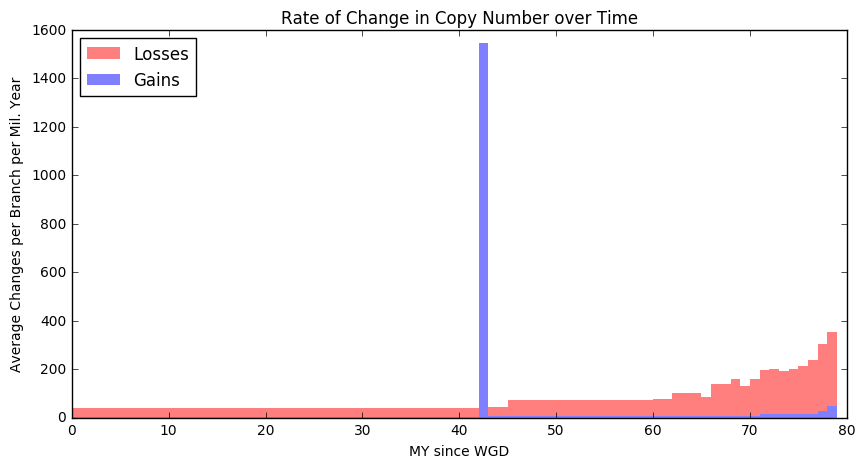

In [18]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def plot_time_histogram(normalized_losses, normalized_gains):
    # plot time_intervals,  plot gains in different colors
    fig, ax = plt.subplots(figsize=(10,5), dpi=100)
    xs = np.arange(0, len(normalized_losses))
    bar_width = 1
    ax.bar(xs, normalized_losses, bar_width,
                    alpha=.5, color='r', linewidth=0,
                    label='Losses')
    ax.bar(xs, normalized_gains, bar_width,
                    alpha=1., color='#7F7FFF', linewidth=0,
                    label='Gains')
    ax.set_xlabel('MY since WGD')
    ax.set_ylabel('Average Changes per Branch per Mil. Year')
    ax.set_title('Rate of Change in Copy Number over Time')
    # ax.set_xticks(index + bar_width / 2)
    # ax.set_xticklabels(('A', 'B', 'C', 'D', 'E'))
    ax.legend(loc='upper left')
    # fig.tight_layout()
plot_time_histogram(normalized_losses, normalized_gains)  

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.4722222222222222, 0.4722222222222222, 1.1977124183006536, 1.1977124183006536, 1.1977124183006536, 1.1977124183006536, 1.1977124183006536, 1.1977124183006536, 1.1977124183006536, 1.1977124183006536, 1.1977124183006536, 1.1977124183006536, 1.1977124183006536, 1.1977124183006536, 1.1977124183006536, 1.1977124183006536, 1.1977124183006536, 1.7810457516339868, 1.7810457516339868, 6.643790849673202, 6.643790849673202, 6.643790849673202, 14.310457516339868, 34.124560080442436, 34.124560080442436, 45.374560080442436, 57.5412267471091, 105.06900452488688, 237.69400452488688, 259.0273378582202, 266.1940045248869, 325.39400452488684, 333.0606711915535, 393.5606711915535, 725.0606711915535, 1401.0606711915534]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 

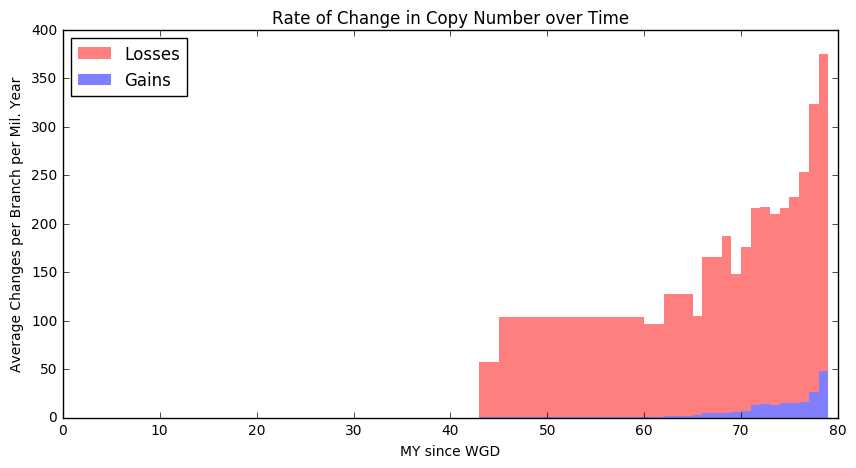

In [19]:
frax_normalized_losses, frax_normalized_gains = populate_change_histogram(ordered_nodes, blacklist_index)
plot_time_histogram(frax_normalized_losses, frax_normalized_gains)

**Conclusion: Supports lag-time model though could be from incomplete assembly and annotation.**

### Same tests but with all JSG instead of only verified WGD families that bias towards FRAX00

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.8333333333333333, 1.8333333333333333, 5.16078431372549, 5.16078431372549, 5.16078431372549, 5.16078431372549, 5.16078431372549, 5.16078431372549, 5.16078431372549, 5.16078431372549, 5.16078431372549, 5.16078431372549, 5.16078431372549, 5.16078431372549, 5.16078431372549, 5.16078431372549, 5.16078431372549, 10.127450980392158, 10.127450980392158, 42.774509803921575, 42.774509803921575, 42.774509803921575, 99.77450980392156, 169.4924585218703, 169.4924585218703, 229.9924585218703, 316.15912518853696, 427.35356963298136, 804.8535696329814, 864.8059505853623, 883.8059505853623, 1119.155950585362, 1136.4892839186955, 1313.322617252029, 2446.3226172520285, 4052.3226172520285]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 5,

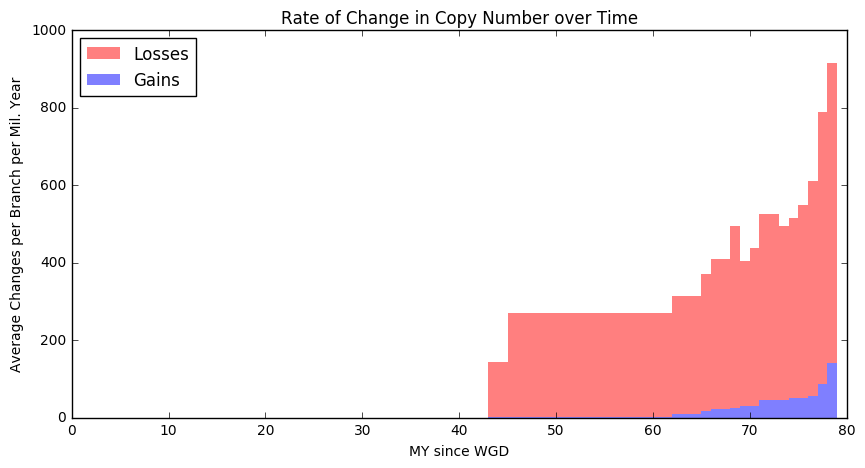

In [20]:
all_normalized_losses, all_normalized_gains = populate_change_histogram(all_ordered_nodes, blacklist_index)
plot_time_histogram(all_normalized_losses, all_normalized_gains)

### Prefiltering for genes that are copy 2 at root

In [21]:
ordered_nodes[2]

{'avg#': 5.828535669586984,
 'gains': 4608,
 'length': 1.0,
 'losses': 0,
 'name': '<55>'}

In [35]:
def get_count_at_root(fam_id, ordered_node_index=2):
    newick_str = all_trees[fam_id]
    tree = loads(newick_str)[0]
    for index, node in enumerate(tree.walk(mode="preorder")):
        if index == ordered_node_index:
            count = extract_count(node)
            return count

In [22]:
    
filtered_wgd_study_ints = [fam for fam in wgd_study_jsg if get_count_at_root(fam) == 2]
assert all([get_count_at_root(fam)==2 for fam in filtered_wgd_study_ints])

print(pp(len(filtered_wgd_study_ints) / len(wgd_study_jsg)), 'preserved')

25.469337% preserved


In [23]:
def i_hist(values):
    bins = [0] * (max(values) +1)
    for v in values:
        bins[v] += 1
    return bins

copies = [ get_count_at_root(fam) for fam in wgd_study_jsg]
print(i_hist(copies))

[0, 184, 1221, 900, 591, 431, 284, 216, 170, 137, 86, 95, 70, 50, 51, 37, 24, 25, 22, 23, 17, 24, 16, 10, 6, 13, 4, 6, 2, 5, 2, 9, 4, 1, 4, 1, 1, 8, 1, 0, 1, 3, 3, 1, 1, 2, 0, 0, 5, 0, 1, 1, 1, 1, 0, 0, 0, 0, 3, 1, 0, 0, 3, 2, 3, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


In [46]:
def pretty_hist(title, raw_values):
    import pandas
    df = pandas.Series(raw_values)#, columns=['Family ID', 'Copies'])
    bins = max(raw_values)
    f = df.hist(bins=bins, figsize=(10,5), facecolor='#31a354', edgecolor='#31a354')#dpi=300)
    f.grid(False)
    f.set_xticks([i for i in range(bins) if i %2 == 0])
    f.set_title(title)
    f.set_xlabel("Number of events")
    f.set_ylabel("Number of Families")

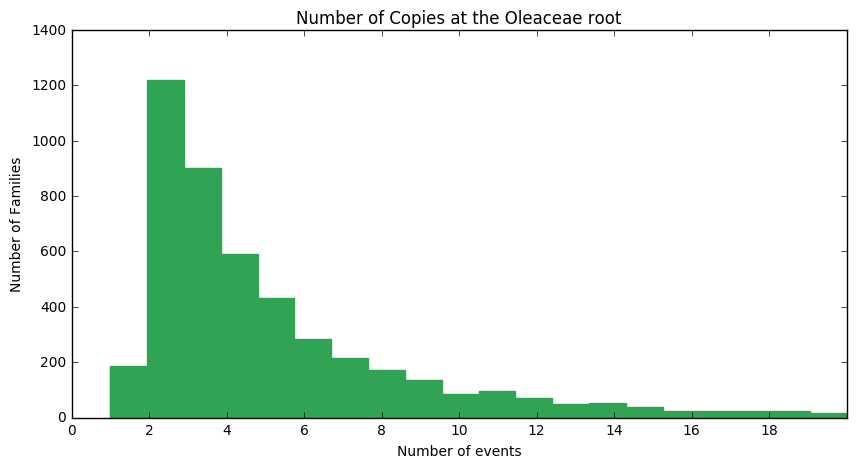

In [47]:
pretty_hist('Number of Copies at the Oleaceae root', [c for c in copies if c < 21])

In [27]:
all_copies = [ get_count_at_root(fam) for fam in all_trees.keys()]

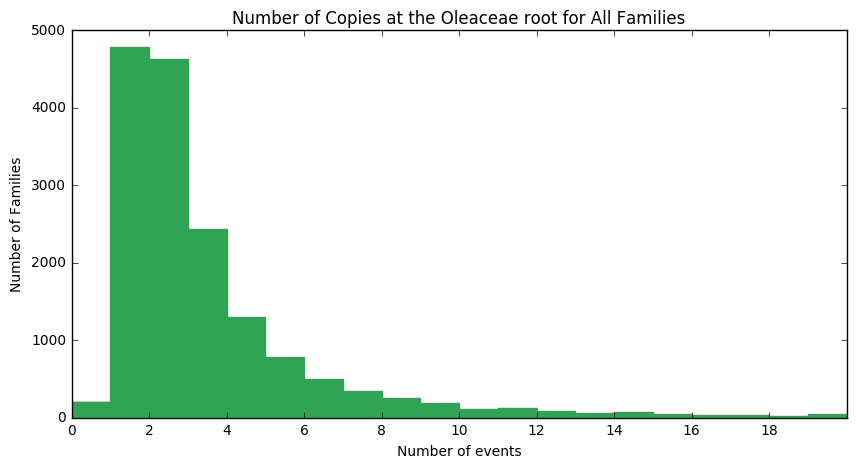

In [48]:
pretty_hist('Number of Copies at the Oleaceae root for All Families', [c for c in all_copies if c < 21])

In [31]:
ordered_nodes[1]  # <57> predates the 'empty' simulation of WGD

{'avg#': 1.118898623279099,
 'gains': 0,
 'length': 42.0,
 'losses': 2872,
 'name': '<57>'}

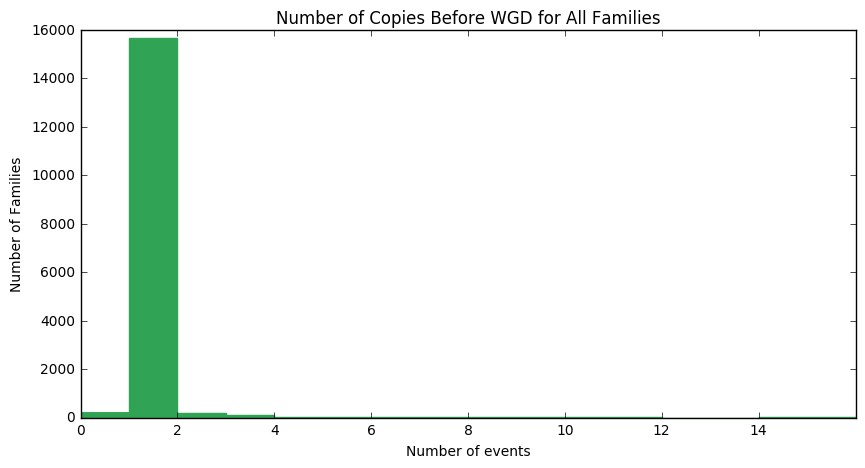

In [49]:
copies_before_WGD = [ get_count_at_root(fam, ordered_node_index=1) for fam in all_trees.keys()]
pretty_hist('Number of Copies Before WGD for All Families', [c for c in copies_before_WGD if c < 21])

This seems like a sign I might have overdone the rate of change for the WGD manual.

In [40]:
ordered_nodes[60]   # <61> outgroup shared node

{'avg#': 2.4399249061326658,
 'gains': 36,
 'length': 42.0,
 'losses': 311,
 'name': '<61>'}

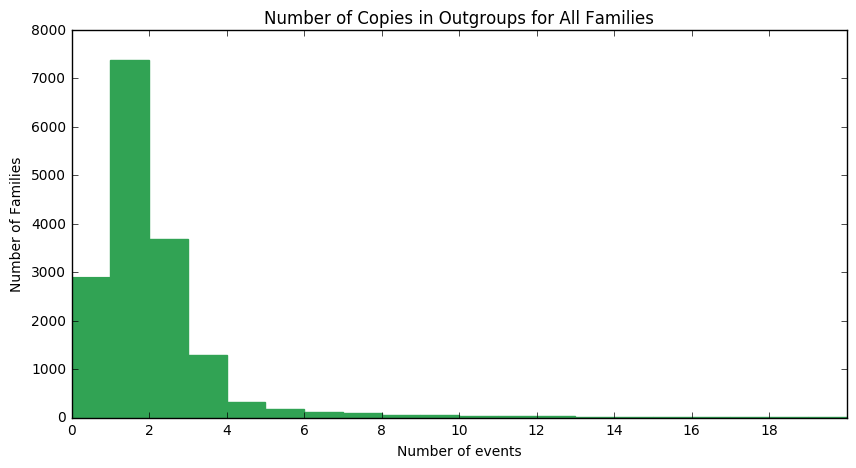

In [50]:
outgroup_copies = [ get_count_at_root(fam, ordered_node_index=60) for fam in all_trees.keys()]
pretty_hist('Number of Copies in Outgroups for All Families', [c for c in outgroup_copies if c < 21])

Outgroups don't look adversely affected by WGD manual

**Conclusion:copy  at root.  **

## Patterns of Repeated Loss
All families in the study have at least one loss event present which could affect one or more species depending on the position in the tree.  If the species with copy number 1 are all monophyletic, then only one event is necessary.  If they are polyphyletic, then multiple events are necessary.  But what is our null distribution?  What is a chance scattering uniformly across time?  Is it similar to our history histogram?

In [133]:
def collect_loss_events_per_family(study_ints, blacklist_index):
    ordered_nodes = create_ordered_nodes()
    loss_events_per_family = {'pad':0}
    for fam_id in study_ints:
        current_family_loss_events = 0
        species_total = 0
        newick_str = all_trees[fam_id]
        tree = loads(newick_str)[0]
        for index, node in enumerate(tree.walk(mode="preorder")):
            count = extract_count(node)
            if node.ancestor and index not in blacklist_index:
                if not node.name.startswith('_'):
                    species_total += count
                parent_count = extract_count(node.ancestor.name)
                if count < parent_count:  # "loss"
                    current_family_loss_events += 1
                elif count > parent_count:  # gain
                    pass
        loss_events_per_family[fam_id] = current_family_loss_events
    pretty_hist("Repeated Loss in the Same Gene Family", list(loss_events_per_family.values()))
    return loss_events_per_family

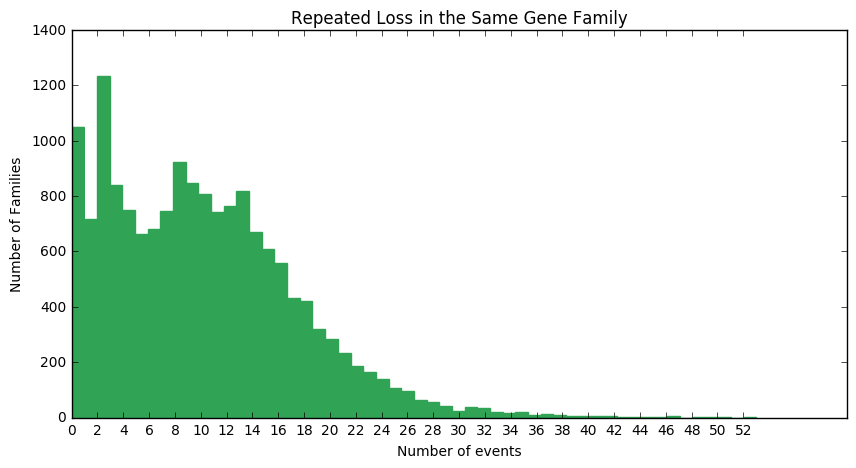

In [64]:
all_loss_events = collect_loss_events_per_family(list(all_trees.keys()), blacklist_index)

* families of different size, big families can have more losses
* Annotation errors
* Different selective constraints

In [54]:
len(filtered_wgd_study_ints)

1221

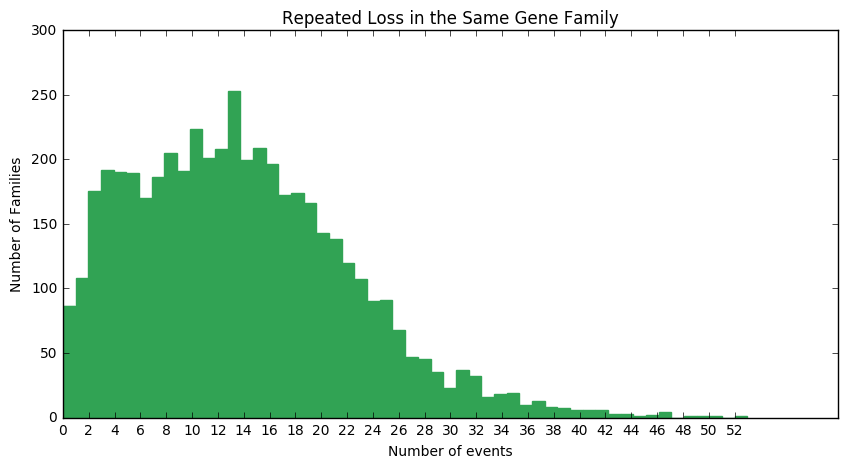

In [70]:
wgd_study_jsg_losses = collect_loss_events_per_family(wgd_study_jsg, blacklist_index)

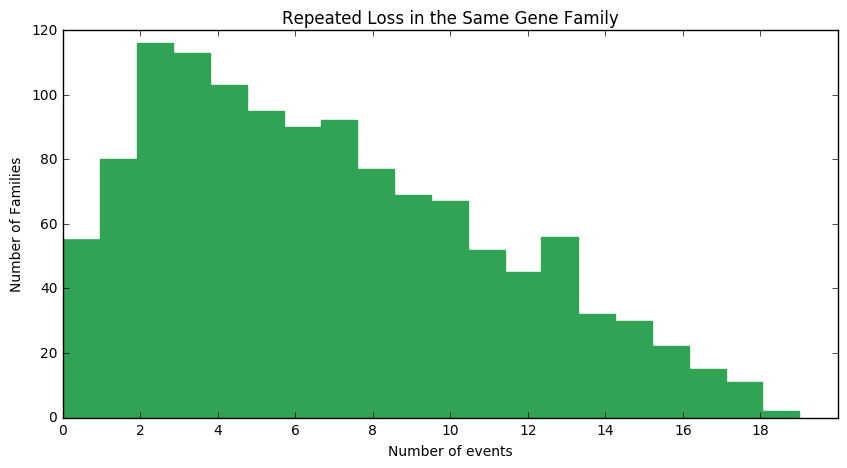

In [116]:
loss_events_per_family = collect_loss_events_per_family(filtered_wgd_study_ints, blacklist_index)

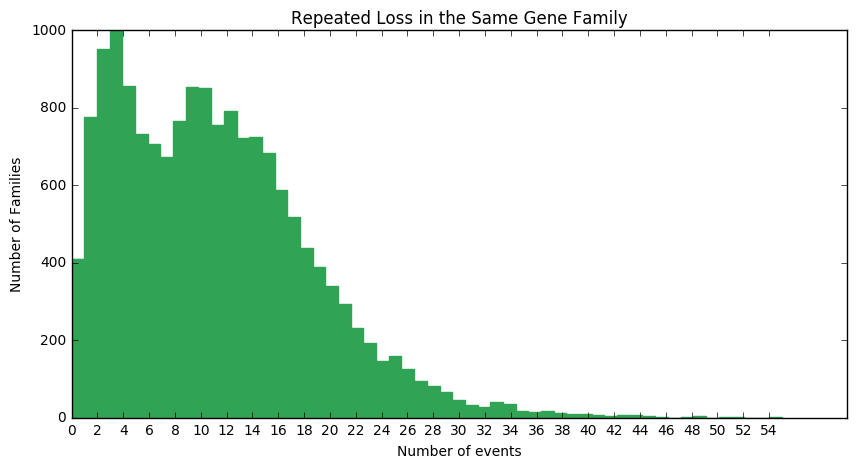

In [117]:
whole_tree_losses = collect_loss_events_per_family(list(all_trees.keys()), blacklist_empty)

There's very clearly two distributions

In [131]:
doubles_ids = [fam for fam in list(all_trees.keys()) if get_count_at_root(fam) == 2]
assert all([get_count_at_root(fam)==2 for fam in doubles_ids])

print(pp(len(doubles_ids) / len(all_trees)), 'preserved')

28.589957% preserved


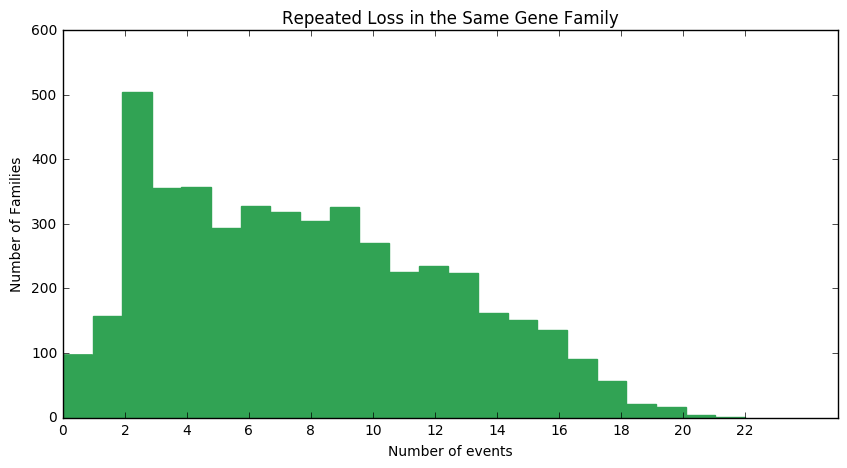

In [134]:
losses_from_all_doubles = collect_loss_events_per_family(doubles_ids, blacklist_index)

**Conclusion**: filtering by doubles looks similar to filtered_wgd_study_ints except there's a bigg peak at 2.

## Categorical Histograms combined

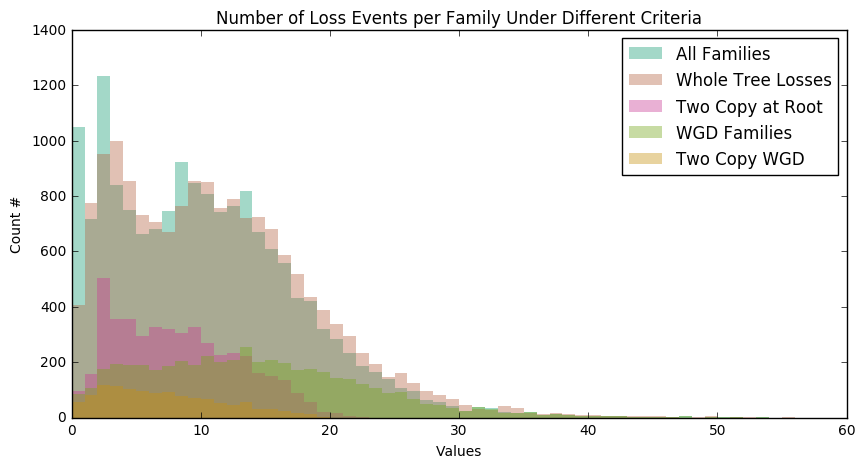

In [143]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def categorical_histogram(title, datasets):
    # plot time_intervals,  plot gains in different colors
    fig, ax = plt.subplots(figsize=(10,5), dpi=600, facecolor='white')
    hist_series = [[label, i_hist(values)] for label, values in datasets.items()]
    longest = max([len(hist[1]) for hist in hist_series])  
    for i, pair in enumerate(hist_series):
        hist_series[i][1] = (hist_series[i][1] + [0] * longest)[:longest] # zero padding
    xs = np.arange(0, longest)  # set x axis
    bar_width = 1
    cmap = plt.get_cmap("Dark2")
    colors = cmap(np.arange(len(datasets))*50)

    height_sorted = sorted(hist_series, key=lambda pair: -max(pair[1]))
    for i, pair in enumerate(height_sorted):
        label, bars = pair
        ax.bar(xs, bars, bar_width,
                    alpha=.4, color=colors[i], linewidth=0,
                    label=label)
        
    ax.set_xlabel('Values')
    ax.set_ylabel('Count #')
    ax.set_title(title)
    # ax.set_xticks(index + bar_width / 2)
    # ax.set_xticklabels(('A', 'B', 'C', 'D', 'E'))
    ax.legend(loc='upper right')
    # fig.tight_layout()
categorical_histogram('Number of Loss Events per Family Under Different Criteria',
    {'All Families': all_loss_events.values(), 'WGD Families': wgd_study_jsg_losses.values(),
     'Two Copy at Root': losses_from_all_doubles.values(),
    'Whole Tree Losses': whole_tree_losses.values(), 'Two Copy WGD': loss_events_per_family.values()})

** There's very clearly multiple distributions being stacked together here.  "All Families" is zero inflated, so there are a decent number of families with no variation at all.  Then there's a spike around 2-3 that is likely the annotation error spike that should actually be assigned to zero.  Following that is the main hump around 10 losses.  This is real variation.  Including outgroup counts shifts the distribution over by one since the outgroups don't share the WGD, but other than that they're very similar.  One might make some inference about the error peak being wider in the outgroups.**

In [136]:
pp(len(all_trees))

'16,191'

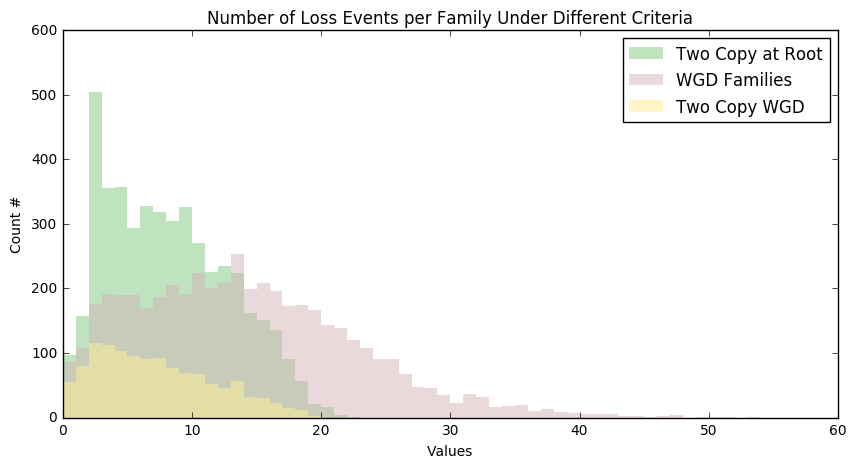

In [138]:
categorical_histogram('Number of Loss Events per Family Under Different Criteria',
    {'WGD Families': wgd_study_jsg_losses.values(),
     'Two Copy at Root': losses_from_all_doubles.values(),
    'Two Copy WGD': loss_events_per_family.values()})

Looks like a [Gamma Distribution](https://www.itl.nist.gov/div898/handbook/eda/section3/eda366.htm)

## Intersecting Sets of Polyphyletic Gene Family losses

In [1]:
from scipy.stats import hypergeom

def simple_overlap_prob(A, B, all_possible, verbose=True):
    intersect = len(set(A).intersection(set(B)))
    if verbose:
        print(pp(len(A)), "overlapping with", pp(len(B)), "by", pp(intersect),"in a space of size", pp(len(all_possible)))
    return min(1, hypergeom.sf(intersect-1, len(all_possible), len(A), len(B)))  # pval assuming even distribution

In [83]:
len(wgd_study_ints)

1376

In [87]:
 species_names = [node['name'] for node in ordered_nodes if node['name'] not in ('Slycopersicum', 'Mguttatus') and not node['name'].startswith('<')]  # 

# All pair wise combintations once
for x in range(len(species_names)):
    for y in range(x+1, len(species_names)):
        intersect = genes_lost[species_names[x]].intersection(genes_lost[species_names[y]])
        print(species_names[x], species_names[y], len(intersect), end=': ')
        print(simple_overlap_prob(genes_lost[species_names[x]], genes_lost[species_names[y]], wgd_study_ints, verbose=False)) #TODO probability

FRAX07 FRAX00 7: 0.9997747487879933
FRAX07 FRAX06 162: 3.355420050429961e-13
FRAX07 FRAX19 68: 0.9999946971359708
FRAX07 FRAX11 47: 0.81186745900096
FRAX07 FRAX09 51: 0.9063975833834643
FRAX07 Oeuropea 220: 0.38209966771441295
FRAX00 FRAX06 0: 1
FRAX00 FRAX19 6: 0.996363998614732
FRAX00 FRAX11 5: 0.8425180653782234
FRAX00 FRAX09 8: 0.5339881089764829
FRAX00 Oeuropea 15: 0.9999731934818008
FRAX06 FRAX19 58: 0.9997608036298027
FRAX06 FRAX11 38: 0.8090430814888122
FRAX06 FRAX09 37: 0.9798808187860083
FRAX06 Oeuropea 186: 0.16128919485233578
FRAX19 FRAX11 32: 0.9264179023470644
FRAX19 FRAX09 39: 0.8440980037300037
FRAX19 Oeuropea 106: 0.9999999999984778
FRAX11 FRAX09 33: 0.013350565009191732
FRAX11 Oeuropea 63: 0.9999283170005032
FRAX09 Oeuropea 95: 0.6348060298416266


** Conclusion: Probabilities of overlapping sets are mostly insignificant.  Most likely assembly errors...**

## Null model for deletion events
Assume a uniform probability of having a deletion at any time point per branch.  Veto deletions that would drop the number to 0 in FRAX00.  Keep creating deletions until the average copy# per extant species matches for that family.

Construct one path for each species.  Path is a set of nodes.  Randomly pick species.  Randomly pick node weighted by node length.  Add a loss event, repeat until average is acheived.  Graph ensuing histogram

```
constraints = FRAX00 must have > 0,  no species has less than 0
n_deletions = 2 * 6 - sum(
for family_tree in all_trees:
    for path in species_paths:
        
        while current_count > terminal_count[species]:
            branch = random.choice(path, weights)
            branch.count -= 1
            for d in branch.descendants:
                branch.count -= 1
                if d.count < actual_count:
                    veto deletion
                #this is getting really complicated
```

In [35]:
all_trees[1]

'((((FRAX07_17:14,(FRAX00_22:10,FRAX06_20:10)_21:4)_21:5,((FRAX19_22:10,FRAX11_20:10)_21:1,FRAX09_19:11)_21:8)_21:17,Oeuropea_20:36)_21:43,(Slycopersicum_10:37,Mguttatus_9:37)_13:42)_21'

In [36]:
img('../Figure for Notes/Distribution of Family Average Copy Number.png')

NameError: name 'img' is not defined

In [ ]:
avg_losses = [600,280, 100,]

# WGD Rates Loose

Lots of overlap in sister species.  Is that significant out of 27,737 families?

In [3]:
goodingii_greggii = 1981
hypergeom.sf(goodingii_greggii-1, 27737, 3261+goodingii_greggii, 6267+goodingii_greggii)  # pval assuming even distribution 27737

2.6112020781788727e-44

In [4]:
angustifolia_syriaca = 1500
hypergeom.sf(angustifolia_syriaca-1, 27737, 2847+angustifolia_syriaca, 5070+angustifolia_syriaca)  # pval assuming even distribution 27737

6.859744062398512e-70

**Conclusion:** That's a good sign these are real overlaps between sister species assembled independently and not simply lossy draft assemblies that overlap by chance.

In [6]:
ornus_bungeana = 50
hypergeom.sf(ornus_bungeana-1, 16191, 1198+ornus_bungeana, 1486+ornus_bungeana)  # pval assuming even distribution

1.0

**Conculsions:** Ornus and bungeana in Expansions of fixed_JSG actually don't have significant overlap.